<a href="https://colab.research.google.com/github/Arpon-30/CVPR/blob/main/Mid/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup & Imports




In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm


2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Load + Convert to Grayscale + Resize + Flatten


In [ ]:
data_path = "/content/drive/MyDrive/CVPR/Assignment 1/animal_dataset"

classes = ["cat", "dog", "panda"]
label_map = {"cat":0, "dog":1, "panda":2}

X = []
y = []

for cls in classes:
    folder = os.path.join(data_path, cls)
    for img_name in tqdm(os.listdir(folder), desc=f"Loading {cls}"):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path).resize((32, 32))
            arr_rgb = np.array(img)

            R = arr_rgb[:, :, 0]
            G = arr_rgb[:, :, 1]
            B = arr_rgb[:, :, 2]

            gray = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)

            arr = gray.flatten()

            X.append(arr)
            y.append(label_map[cls])
        except:
            pass

X = np.array(X)
y = np.array(y)

print("Dataset Loaded:", X.shape, y.shape)

Loading panda: 100%|██████████| 100/100 [00:00<00:00, 132.73it/s]

Dataset Loaded: (299, 1024) (299,)


4.Shuffle Dataset

In [ ]:
idx = np.arange(len(X))
np.random.shuffle(idx)

X = X[idx]
y = y[idx]


5.Split into 5 folds

In [ ]:
def create_folds(X, y, k=5):
    fold_size = len(X) // k
    folds_X = []
    folds_y = []

    for i in range(k):
        folds_X.append(X[i*fold_size:(i+1)*fold_size])
        folds_y.append(y[i*fold_size:(i+1)*fold_size])

    return folds_X, folds_y

folds_X, folds_y = create_folds(X, y)
print("5-folds created.")


5-folds created.


6.Distance Functions (L1 & L2)

In [ ]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


7.KNN Implementation

In [ ]:
def predict_knn(train_X, train_y, test_sample, K, distance_type="L1"):
    distances = []

    for i in range(len(train_X)):
        if distance_type == "L1":
            dist = manhattan_distance(test_sample, train_X[i])
        else:
            dist = euclidean_distance(test_sample, train_X[i])
        distances.append((dist, train_y[i]))

    distances = sorted(distances, key=lambda x: x[0])

    k_labels = [label for _, label in distances[:K]]
    counts = np.bincount(k_labels)
    return np.argmax(counts)


8. Evaluate Accuracy for One Fold

In [ ]:
def evaluate_fold(train_X, train_y, test_X, test_y, K, distance_type):
    correct = 0
    for i in range(len(test_X)):
        pred = predict_knn(train_X, train_y, test_X[i], K, distance_type)
        if pred == test_y[i]:
            correct += 1
    return correct / len(test_y)


9.Check K wise result

In [ ]:
K_values = [1, 3, 5,9]

results_L1 = []
results_L2 = []

print("   FOLD-WISE ACCURACY TABLE")

for K in K_values:
    print(f"\n---------- K = {K} ----------")

    fold_acc_L1 = []
    fold_acc_L2 = []

    for i in range(5):

        print(f"\nFold {i+1}:")

        test_X = folds_X[i]
        test_y = folds_y[i]

        train_X = np.vstack([folds_X[j] for j in range(5) if j != i])
        train_y = np.hstack([folds_y[j] for j in range(5) if j != i])

        acc_L1 = evaluate_fold(train_X, train_y, test_X, test_y, K, "L1")
        acc_L2 = evaluate_fold(train_X, train_y, test_X, test_y, K, "L2")

        fold_acc_L1.append(acc_L1)
        fold_acc_L2.append(acc_L2)

        print(f"   L1 Accuracy = {acc_L1:.2f}%")
        print(f"   L2 Accuracy = {acc_L2:.2f}%")

    mean_L1 = np.mean(fold_acc_L1)
    mean_L2 = np.mean(fold_acc_L2)

    results_L1.append(mean_L1)
    results_L2.append(mean_L2)

    print(f"\n>>> Average L1 Accuracy for K={K}: {mean_L1:.2f}%")
    print(f">>> Average L2 Accuracy for K={K}: {mean_L2:.2f}%")
    print("---------------------------------------------")

print("\nFINAL MEAN RESULTS")
print("------------------------------")
print("L1 Mean Accuracies:", results_L1)
print("L2 Mean Accuracies:", results_L2)

   FOLD-WISE ACCURACY TABLE

---------- K = 1 ----------

Fold 1:
   L1 Accuracy = 0.47%
   L2 Accuracy = 0.31%

Fold 2:
   L1 Accuracy = 0.49%
   L2 Accuracy = 0.37%

Fold 3:
   L1 Accuracy = 0.34%
   L2 Accuracy = 0.25%

Fold 4:
   L1 Accuracy = 0.46%
   L2 Accuracy = 0.39%

Fold 5:
   L1 Accuracy = 0.29%
   L2 Accuracy = 0.39%

>>> Average L1 Accuracy for K=1: 0.41%
>>> Average L2 Accuracy for K=1: 0.34%
---------------------------------------------

---------- K = 3 ----------

Fold 1:
   L1 Accuracy = 0.46%
   L2 Accuracy = 0.25%

Fold 2:
   L1 Accuracy = 0.42%
   L2 Accuracy = 0.37%

Fold 3:
   L1 Accuracy = 0.41%
   L2 Accuracy = 0.25%

Fold 4:
   L1 Accuracy = 0.56%
   L2 Accuracy = 0.34%

Fold 5:
   L1 Accuracy = 0.31%
   L2 Accuracy = 0.36%

>>> Average L1 Accuracy for K=3: 0.43%
>>> Average L2 Accuracy for K=3: 0.32%
---------------------------------------------

---------- K = 5 ----------

Fold 1:
   L1 Accuracy = 0.51%
   L2 Accuracy = 0.24%

Fold 2:
   L1 Accuracy = 0.54

10. Evaluate All K Values Across All Folds

In [ ]:
K_values = [1, 3, 5, 7, 9]

results_L1 = []
results_L2 = []

for K in K_values:
    fold_acc_L1 = []
    fold_acc_L2 = []

    for i in range(5):
        test_X = folds_X[i]
        test_y = folds_y[i]

        train_X = np.vstack([folds_X[j] for j in range(5) if j != i])
        train_y = np.hstack([folds_y[j] for j in range(5) if j != i])

        acc_L1 = evaluate_fold(train_X, train_y, test_X, test_y, K, "L1")
        acc_L2 = evaluate_fold(train_X, train_y, test_X, test_y, K, "L2")

        fold_acc_L1.append(acc_L1)
        fold_acc_L2.append(acc_L2)

    results_L1.append(np.mean(fold_acc_L1))
    results_L2.append(np.mean(fold_acc_L2))

print("L1 Results:", results_L1)
print("L2 Results:", results_L2)


L1 Results: [np.float64(0.4101694915254238), np.float64(0.43050847457627117), np.float64(0.4508474576271186), np.float64(0.42711864406779665), np.float64(0.4203389830508474)]
L2 Results: [np.float64(0.34237288135593225), np.float64(0.31525423728813556), np.float64(0.33559322033898303), np.float64(0.36610169491525424), np.float64(0.3593220338983051)]


11. Plot Accuracy vs K

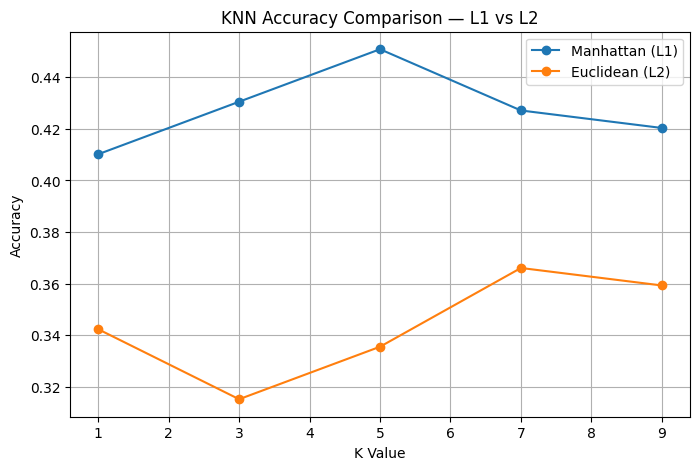

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_values, results_L1, marker='o', label="Manhattan (L1)")
plt.plot(K_values, results_L2, marker='o', label="Euclidean (L2)")

plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison — L1 vs L2")
plt.legend()
plt.grid(True)
plt.show()


12. Show Top 5 Predictions

Top 5 Predictions (L1 & L2):



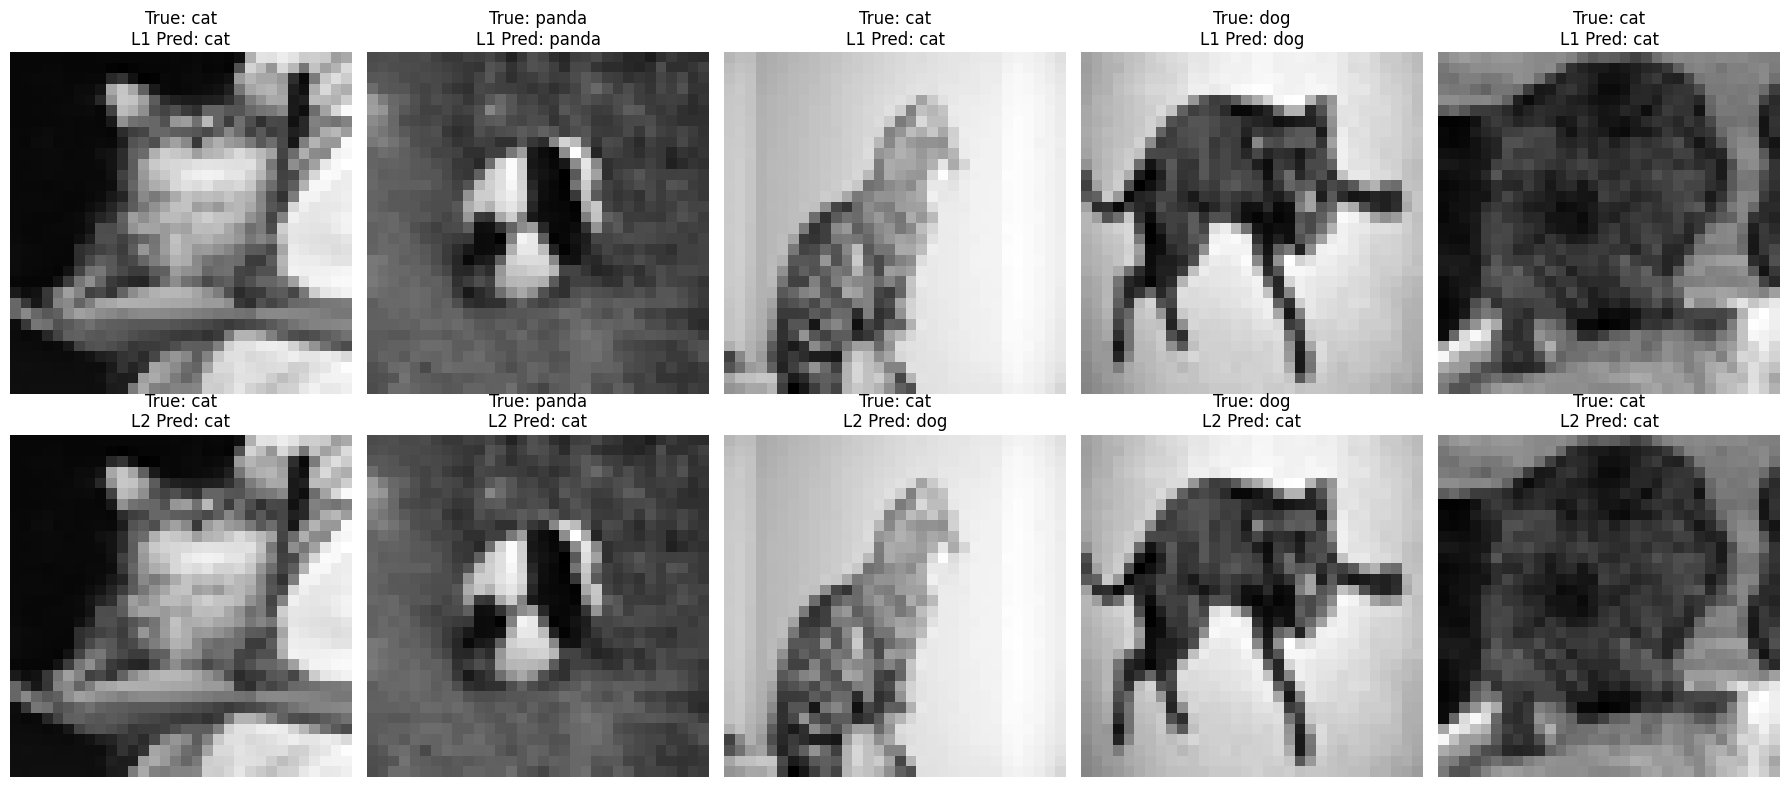


Accuracy (L1): 5/5 = 100.00%
Accuracy (L2): 2/5 = 40.00%


In [ ]:
total = 5

correct_L1 = 0
correct_L2 = 0

plt.figure(figsize=(18, 8))

print("Top 5 Predictions (L1 & L2):\n")

for i in range(total):

    idx = random.randint(0, len(X)-1)
    img = X[idx]
    true_label = y[idx]

    pred_L1 = predict_knn(X, y, img, K=3, distance_type="L1")
    pred_L2 = predict_knn(X, y, img, K=3, distance_type="L2")

    if pred_L1 == true_label:
        correct_L1 += 1

    if pred_L2 == true_label:
        correct_L2 += 1

    plt.subplot(2, total, i+1)
    plt.imshow(img.reshape(32, 32), cmap="gray")
    plt.title(
        f"True: {classes[true_label]}\nL1 Pred: {classes[pred_L1]}"
    )
    plt.axis("off")

    plt.subplot(2, total, total+i+1)
    plt.imshow(img.reshape(32, 32), cmap="gray")
    plt.title(
        f"True: {classes[true_label]}\nL2 Pred: {classes[pred_L2]}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()

# Accuracy
acc_L1 = (correct_L1 / total) * 100
acc_L2 = (correct_L2 / total) * 100

print(f"\nAccuracy (L1): {correct_L1}/{total} = {acc_L1:.2f}%")
print(f"Accuracy (L2): {correct_L2}/{total} = {acc_L2:.2f}%")
